In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import os
from pathlib import Path

In [ ]:
# mit stats irgendwie die spieler rausfinden und explosionen etc nicht mitnehmen

def player_filter(data):
    data.drop(columns=['white','teal',"darkteal","gray"], inplace=True, errors='ignore')
    return data

In [114]:
class Colors:
    @staticmethod
    def red():
        return (239, 8, 8)

    @staticmethod
    def darkred():
        return (148, 20, 33)

    @staticmethod
    def orange():
        return (255, 134, 57)

    @staticmethod
    def darkorange():
        return (181, 101, 24)

    @staticmethod
    def darkgold():
        return (165, 150, 0)

    @staticmethod
    def yellow():
        return (255, 251, 0)

    @staticmethod
    def lime():
        return (156, 219, 0)

    @staticmethod
    def green():
        return (66, 190, 66)

    @staticmethod
    def darkgreen():
        return (41, 138, 82)

    @staticmethod
    def teal():
        return (41, 77, 74)

    @staticmethod
    def darkteal():
        return (41, 77, 74)

    @staticmethod
    def blue():
        return (66, 109, 239)

    @staticmethod
    def darkblue():
        return (41, 40, 231)

    @staticmethod
    def purple():
        return (90, 0, 165)

    @staticmethod
    def violet():
        return (148, 97, 255)

    @staticmethod
    def turkis():
        return (99, 255, 206)

    @staticmethod
    def white():
        return (255, 255, 255)

    @staticmethod
    def gray():
        return (99, 109, 123)

    @staticmethod
    def magenta():
        return (255, 138, 255)

    @staticmethod
    def pink():
        return (255, 48, 255)

parent_dir = Path.cwd().parent
file_path = parent_dir / "data" / "processed" / "Session_5s_2025-09-11_02-44-10" / "stats.csv"
#file_path = parent_dir / "data" / "processed" / "Session_5s_2025-09-16_15-36-40" / "stats.csv"
screenshot_path = parent_dir / "data" / "processed" / "Session_5s_2025-09-11_02-44-10" / "screenshot.png"
# Datei laden (z. B. mit pandas)




df = pd.read_csv(file_path)
player_filter(df)
df.drop(columns=['Frame'], inplace=True, errors='ignore')

print(df.head())

   blue  darkblue  darkgold  darkgreen  darkorange  darkred  green  lime  \
0     0         0         0          0           0        0      0     0   
1   362       317       676         46         357      408      0   670   
2   565       627      1411         52         723     1043      0  1939   
3   669       832      1366         27        1184     1784      0  1554   
4  1087      1233      1396         32        1948     2282      0  1606   

   magenta  orange  pink  purple   red  turkis  violet  yellow  
0        0       0     0       0     0       0       0       0  
1      234     477     0       0   186     380     750     680  
2      733    1041     0       4   380     309    1161    1591  
3     1329    1924     0      12   749     140    1505    1812  
4     1513    2118     0      16  1295       0    1918    1988  


In [115]:

base_dir = Path.cwd().parent / "data" / "processed"
session_dirs = [d for d in base_dir.iterdir() if d.is_dir()]

name = []
stats = []
for session_dir in session_dirs:
    # Pfad zur stats.csv
    stats_file = session_dir / "stats.csv"
    data = pd.read_csv(stats_file)
    data.drop(columns=['Frame'], inplace=True, errors='ignore')
    
    data = player_filter(data)
    stats.append(data)
    name.append(session_dir.name)

bilder = []
screen_dir = Path.cwd().parent / "data" / "raw" / "screenshots"
session_dirs = [d for d in screen_dir.iterdir() if d.is_dir()]

for session_dir in session_dirs:
    screenshot_files = sorted(session_dir.glob("*.png"))
    stats_file = session_dir / screenshot_files[0]
    bilder.append(stats_file)

Session_5s_2025-09-11_02-44-10


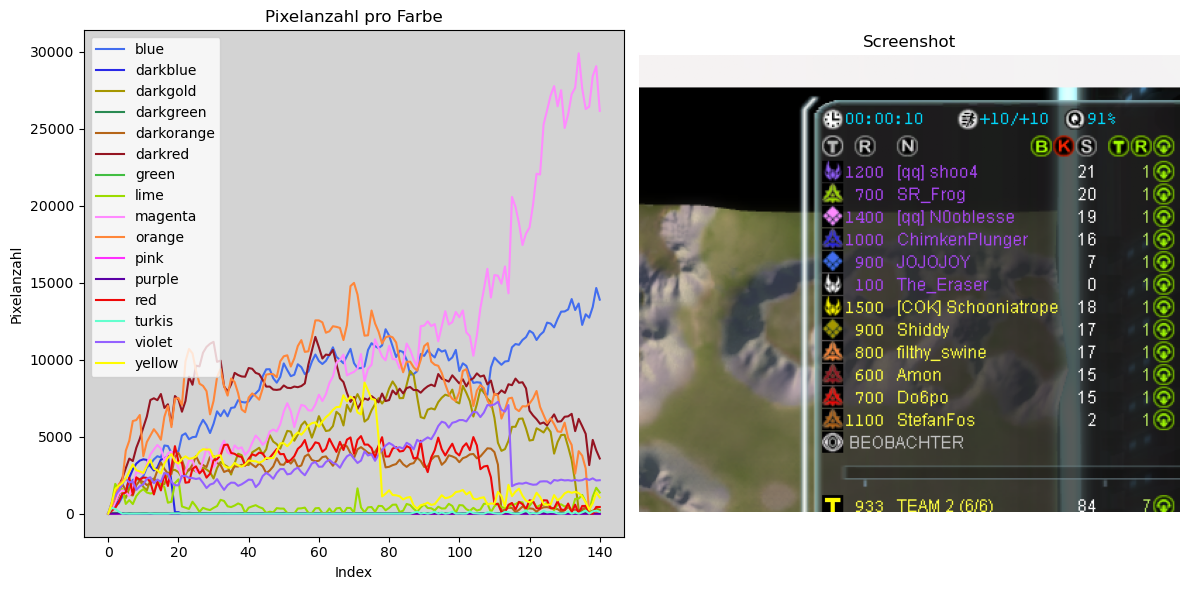

Session_5s_2025-09-16_15-36-40


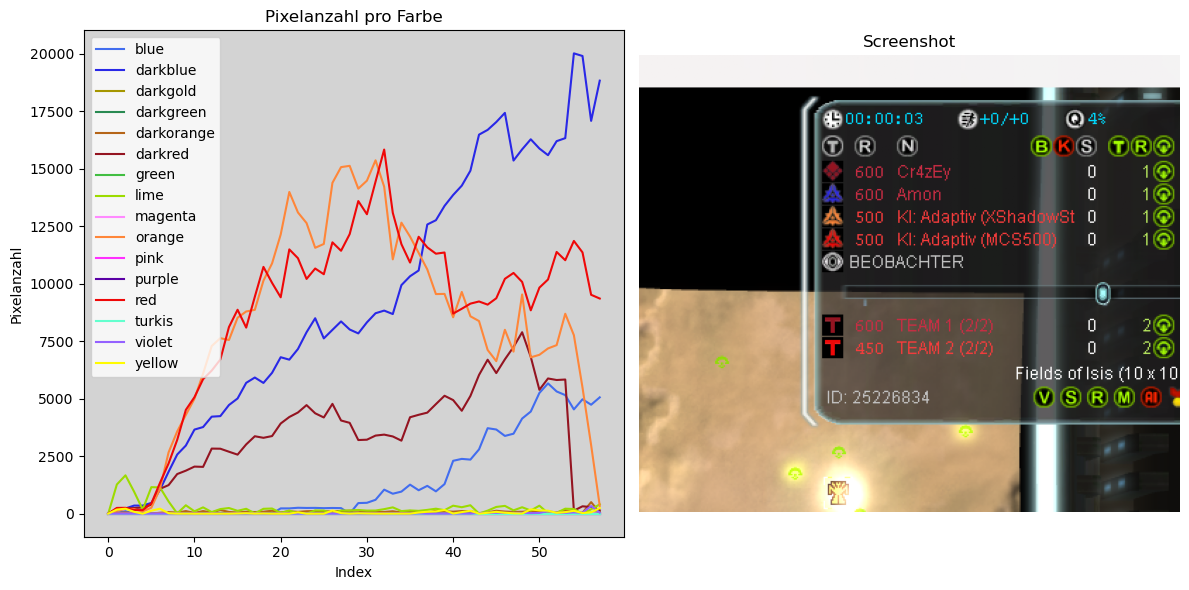

In [117]:
colors = Colors()

for s,b,n in zip(stats,bilder,name):
    print(n)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    for column in s.columns:
        color_method = getattr(colors, column)
        color_value = color_method()
        normalized_color = tuple(c / 255.0 for c in color_value)
        axes[0].plot(s.index, s[column], label=column, c=normalized_color)

    axes[0].set_facecolor("lightgray")
    axes[0].set_title("Pixelanzahl pro Farbe")
    axes[0].legend()
    axes[0].set_xlabel("Index")
    axes[0].set_ylabel("Pixelanzahl")

    
    img = mpimg.imread(b)
    height, width, _ = img.shape
    # crop_top = int(height * 0.0)  # 10% von oben
    # crop_bottom = int(height * 0.8)  # 90% von unten
    # crop_left = int(width * 0.2)  # 10% von links
    # crop_right = int(width * 0.9)  # 90% von rechts

    crop_top = int(height * 0.0)  # 10% von oben
    crop_bottom = int(height * 0.3)  # 90% von unten
    crop_left = int(width * 0.7)  # 10% von links
    crop_right = int(width * 0.9)  # 90% von rechts


    # Bild zuschneiden
    cropped_img = img[crop_top:crop_bottom, crop_left:crop_right]
    axes[1].imshow(cropped_img)
    axes[1].axis("off") 
    axes[1].set_title("Screenshot")

    # Plot anzeigen
    plt.tight_layout()
    plt.show()